# Import libraries


In [809]:
pip install missingno


In [883]:
import numpy  as np 
import pandas as pd 
import matplotlib.pyplot  as plt 
import seaborn  as sns 
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score ,classification_report ,confusion_matrix
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsClassifier
# import sklearn.ensemble.RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score


import graphviz 
import warnings
import missingno as msno
import sklearn



# Load and some describe

In [811]:
df_diabetes = pd.read_csv('diabetes.csv')

In [812]:
df_diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Pregnancies   : Number of times pregnan
Glucose       : Plasma glucose concentration a 2 hours in an oral glucose tolerance test    
BloodPressure : Diastolic blood pressure (mm Hg)
SkinThickness :  Triceps skin fold thickness (mm)
Insulin       : 2-Hour serum insulin (mu U/ml)
BMI           : Body mass index (weight in kg/(height in m)^2)
DiabetesPedigreeFunction : Diabetes pedigree function
Age  : Age (years)

Outcome : Class variable (0 or 1) 268 of 768 are 1, the others are 0

In [813]:
df_diabetes.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [814]:
df_diabetes.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [815]:
df_diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [816]:
df_diabetes['Outcome'].value_counts()

# 0 --> Non-Diabetic

# 1 --> Diabetic

0    500
1    268
Name: Outcome, dtype: int64

In [817]:
# Replacing zero values with NaN
# Clear data replace 0 with empty values NaN.

for col in df_diabetes.columns:
    if col not in ( "Outcome","Pregnancies", "DiabetesPedigreeFunction"):
        df_diabetes[col] = df_diabetes[col].replace(to_replace=0, value=np.NaN)
    else:
        df_diabetes[col]

In [818]:
df_diabetesk1 =df_diabetes

In [819]:
df_diabetes.isnull().sum()


Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

<AxesSubplot:>

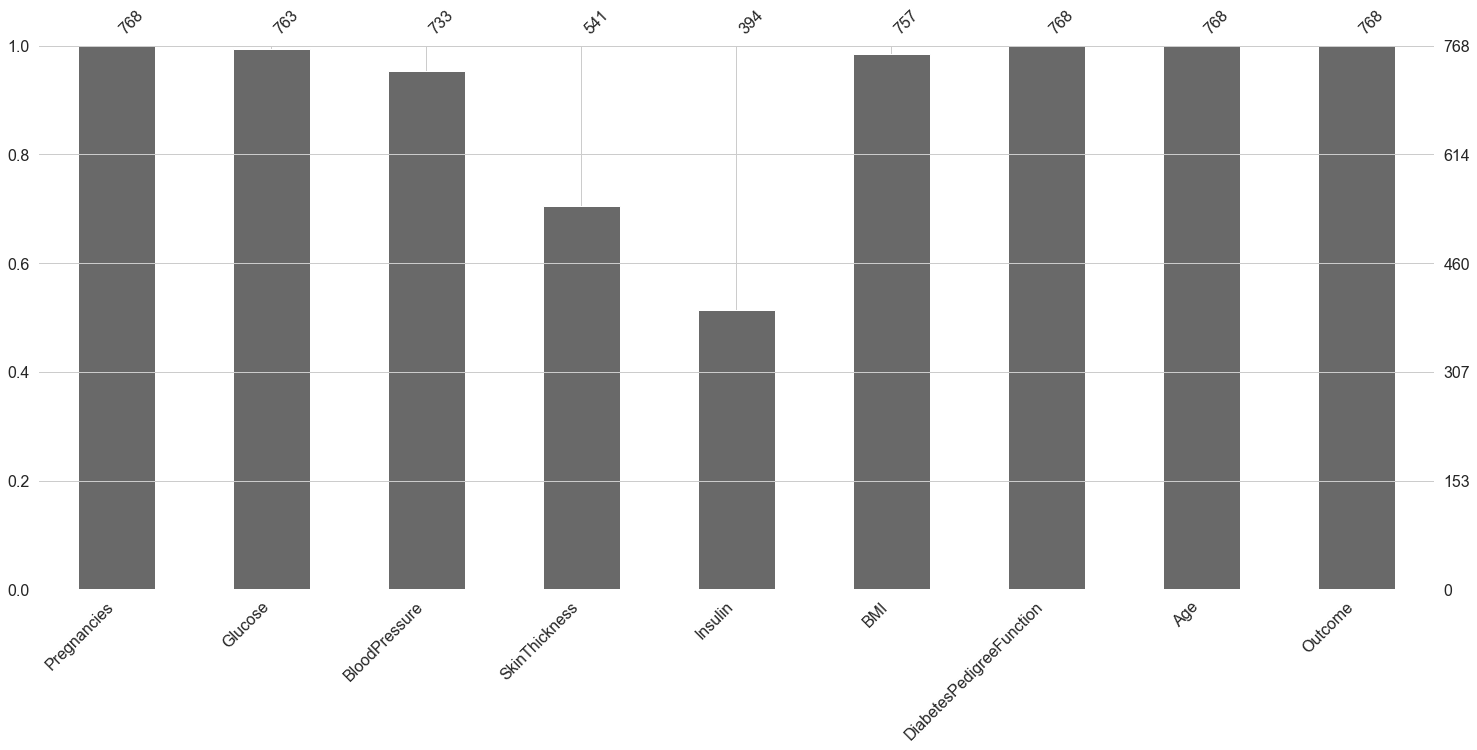

In [820]:
msno.bar(df_diabetes)


<AxesSubplot:>

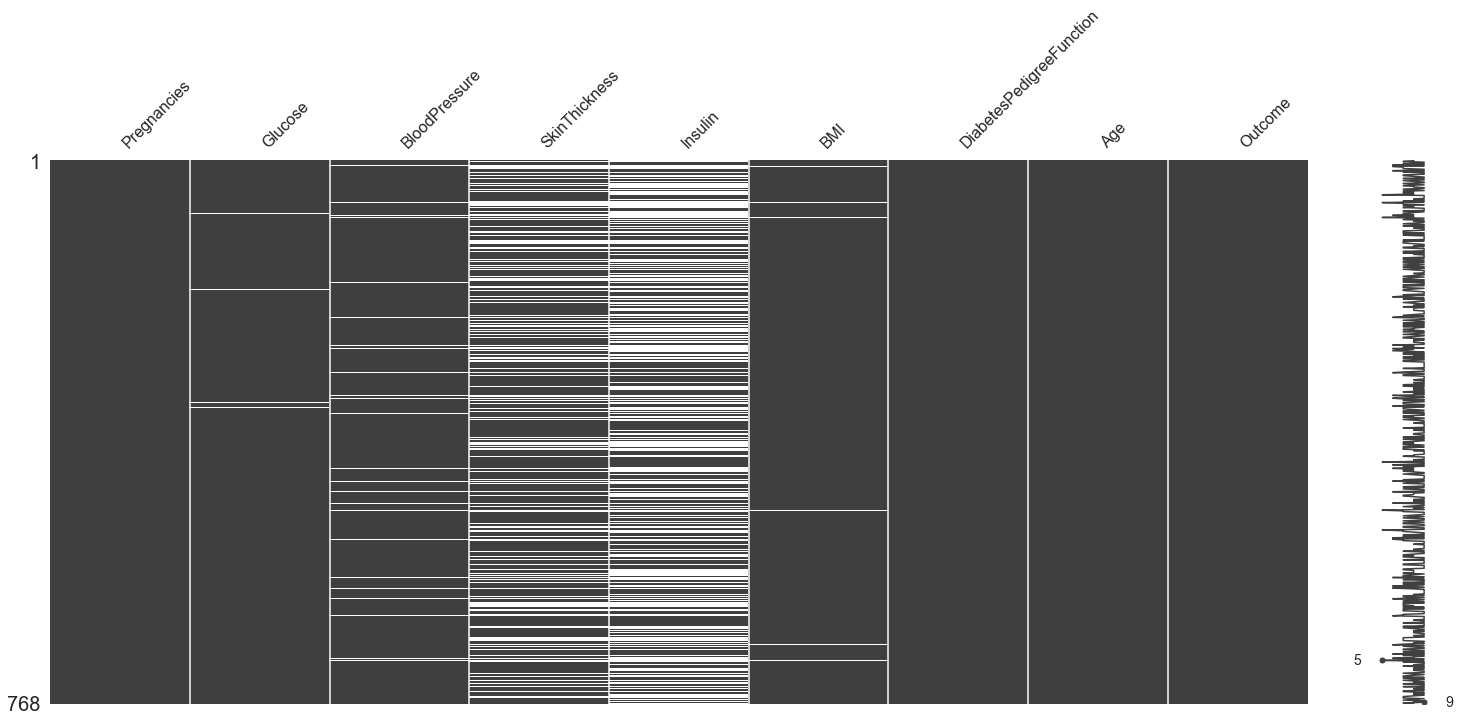

In [821]:
msno.matrix(df_diabetes)


Heatmap


The heatmap is used to identify correlations of the nullity between each of the different columns. In other words, it can be used to identify if there is a relationship in the presence of null values between each of the columns.

Values close to positive 1 indicate that the presence of null values in one column is correlated with the presence of null values in another column.

Values close to negative 1 indicate that the presence of null values in one column is anti-correlated with the presence of null values in another column. In other words, when null values are present in one column, there are data values present in the other column, and vice versa.

Values close to 0, indicate there is little to no relationship between the presence of null values in one column compared to another.

There are a number of values that show as <-1. This indicates that the correlation is very close to being 100% negative.

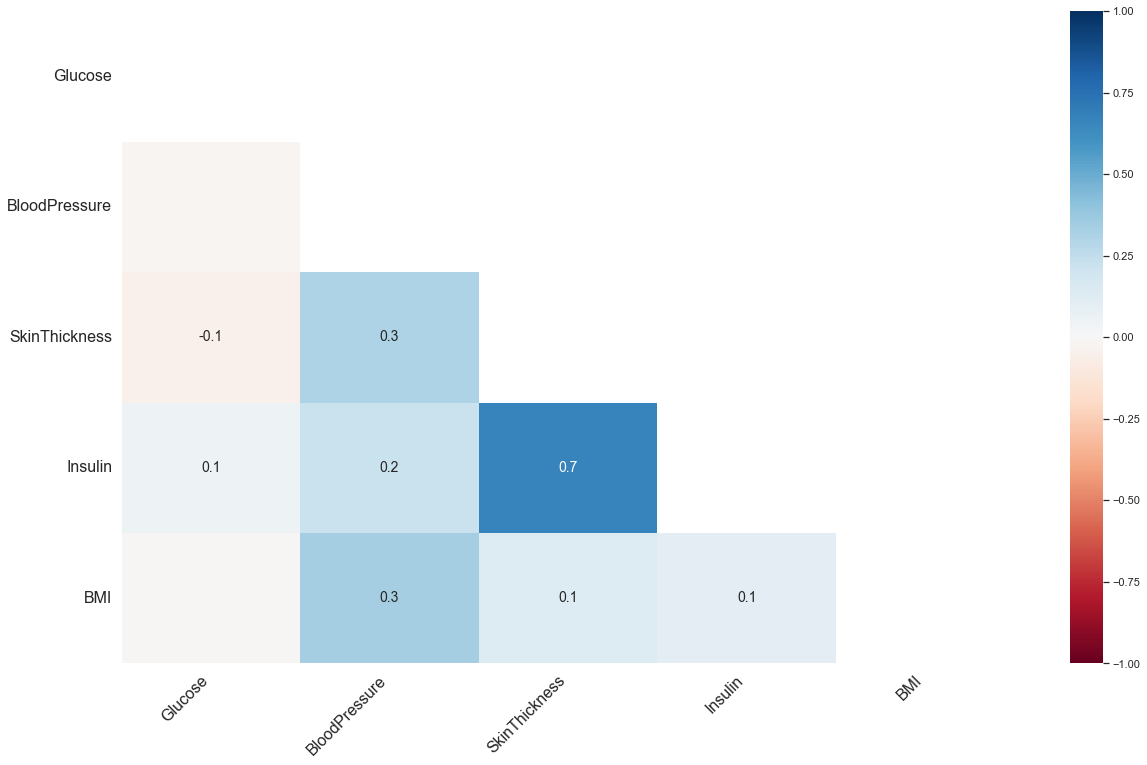

In [822]:
msno.heatmap(df_diabetes)
plt.show()

In [823]:
# Replacing NaN with mean values
df_diabetes["Glucose"].fillna(df_diabetes["Glucose"].mean(), inplace = True)
df_diabetes["BloodPressure"].fillna(df_diabetes["BloodPressure"].mean(), inplace = True)
df_diabetes["SkinThickness"].fillna(df_diabetes["SkinThickness"].mean(), inplace = True)
df_diabetes["Insulin"].fillna(df_diabetes["Insulin"].mean(), inplace = True)
df_diabetes["BMI"].fillna(df_diabetes["BMI"].mean(), inplace = True)

In [824]:
df_diabetes.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

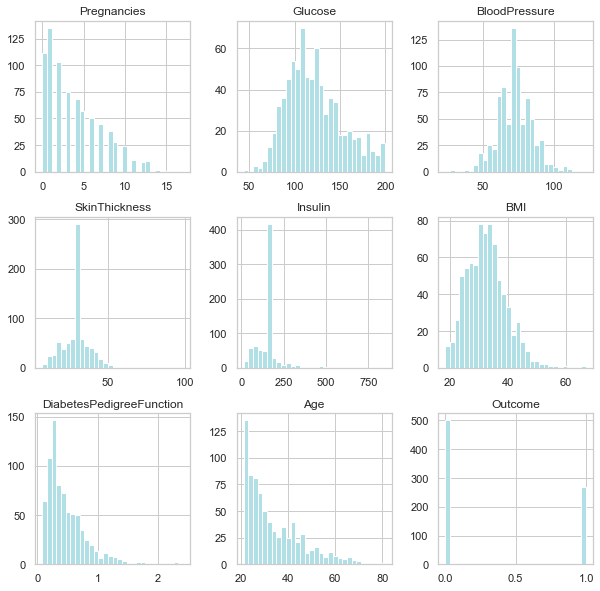

In [825]:
df_diabetes.hist(figsize = (10,10) , bins = 30 ,color='#b0e0e6' ,alpha = 1)
plt.show()

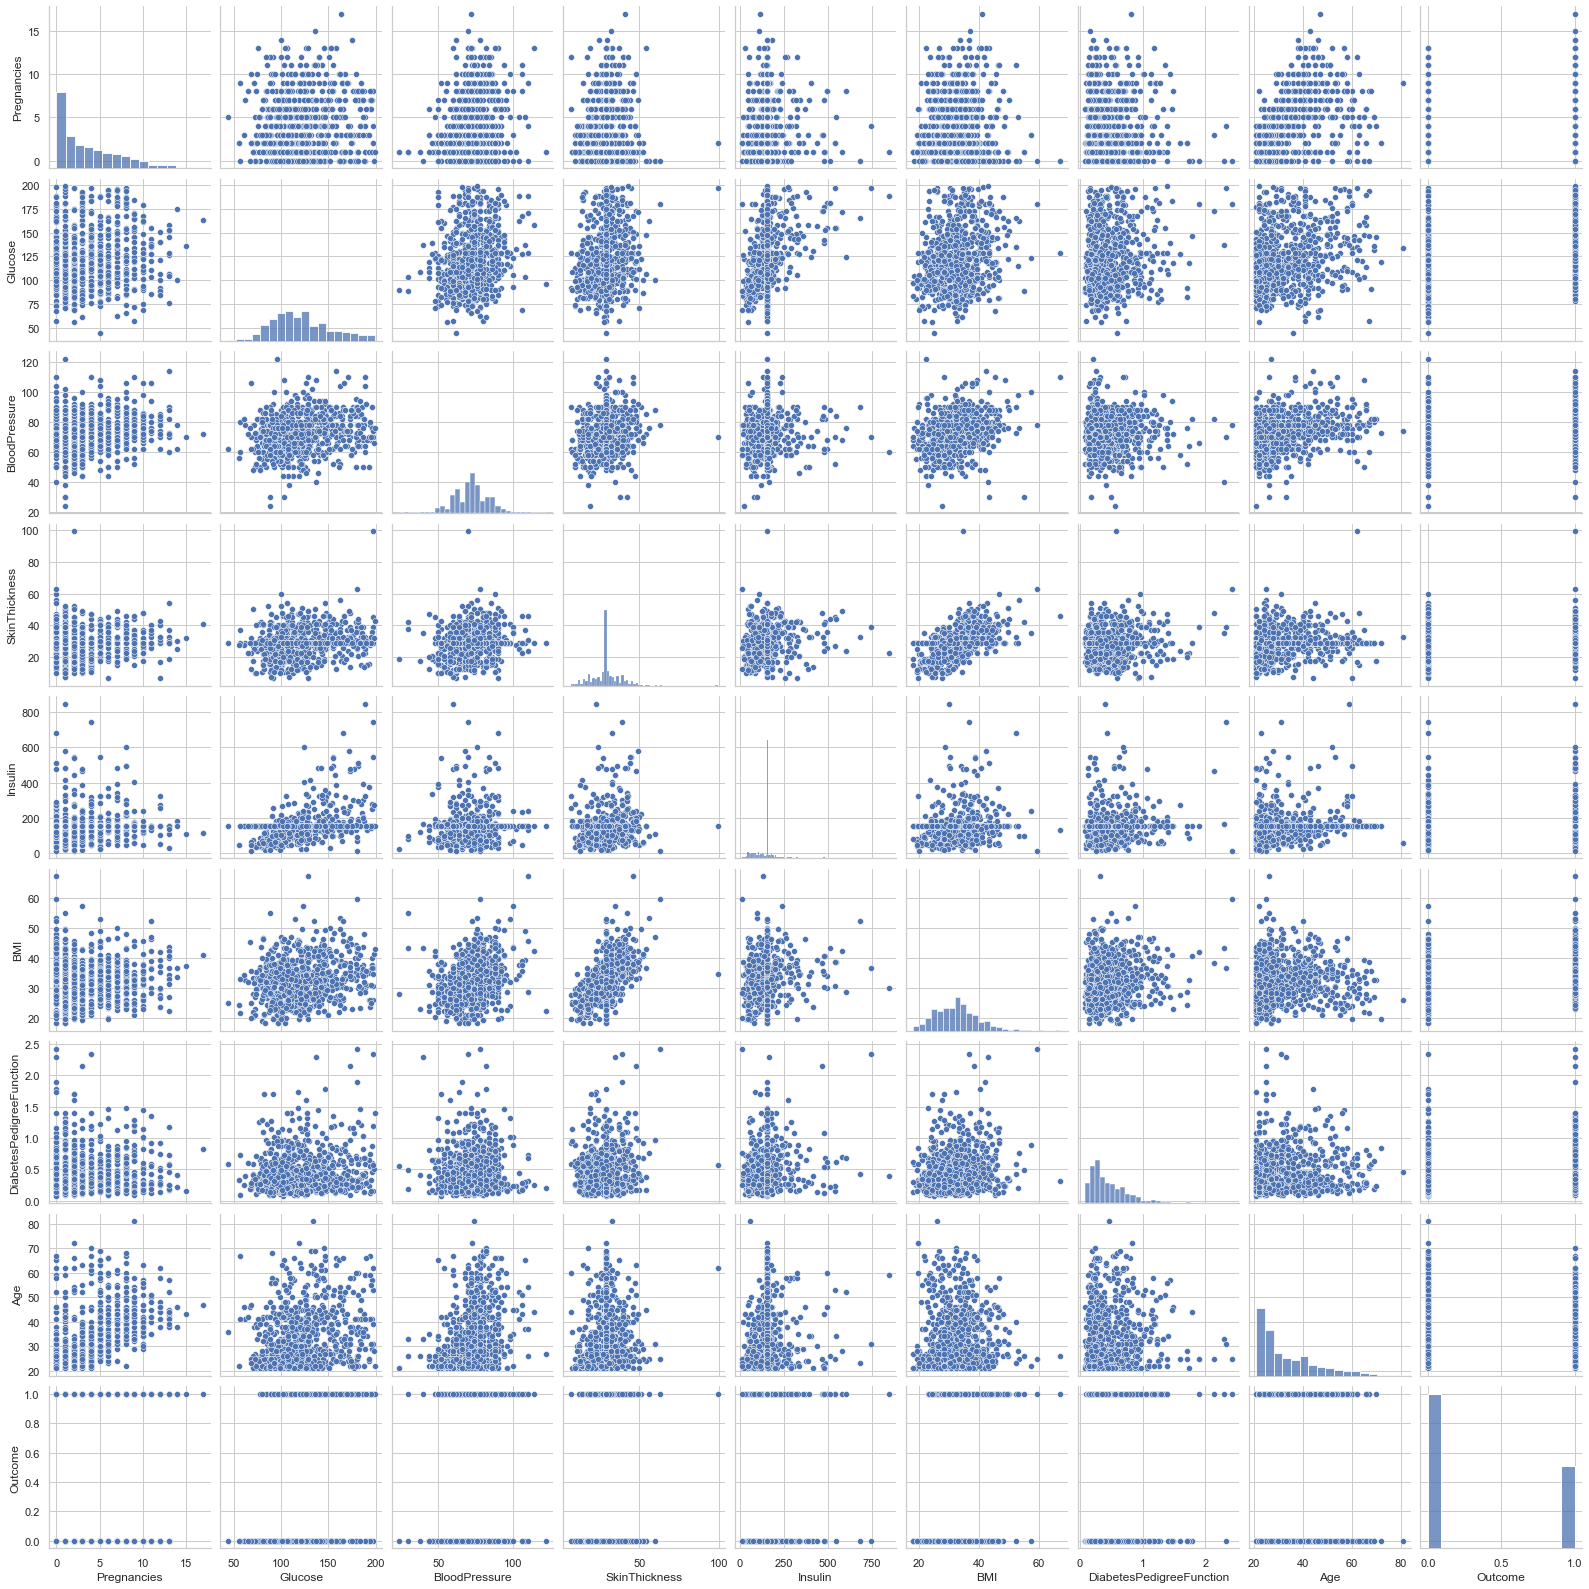

In [826]:
#Measure the relation , correlation and dependency between all numerical vairiables----pairplot
sns.pairplot(df_diabetes)


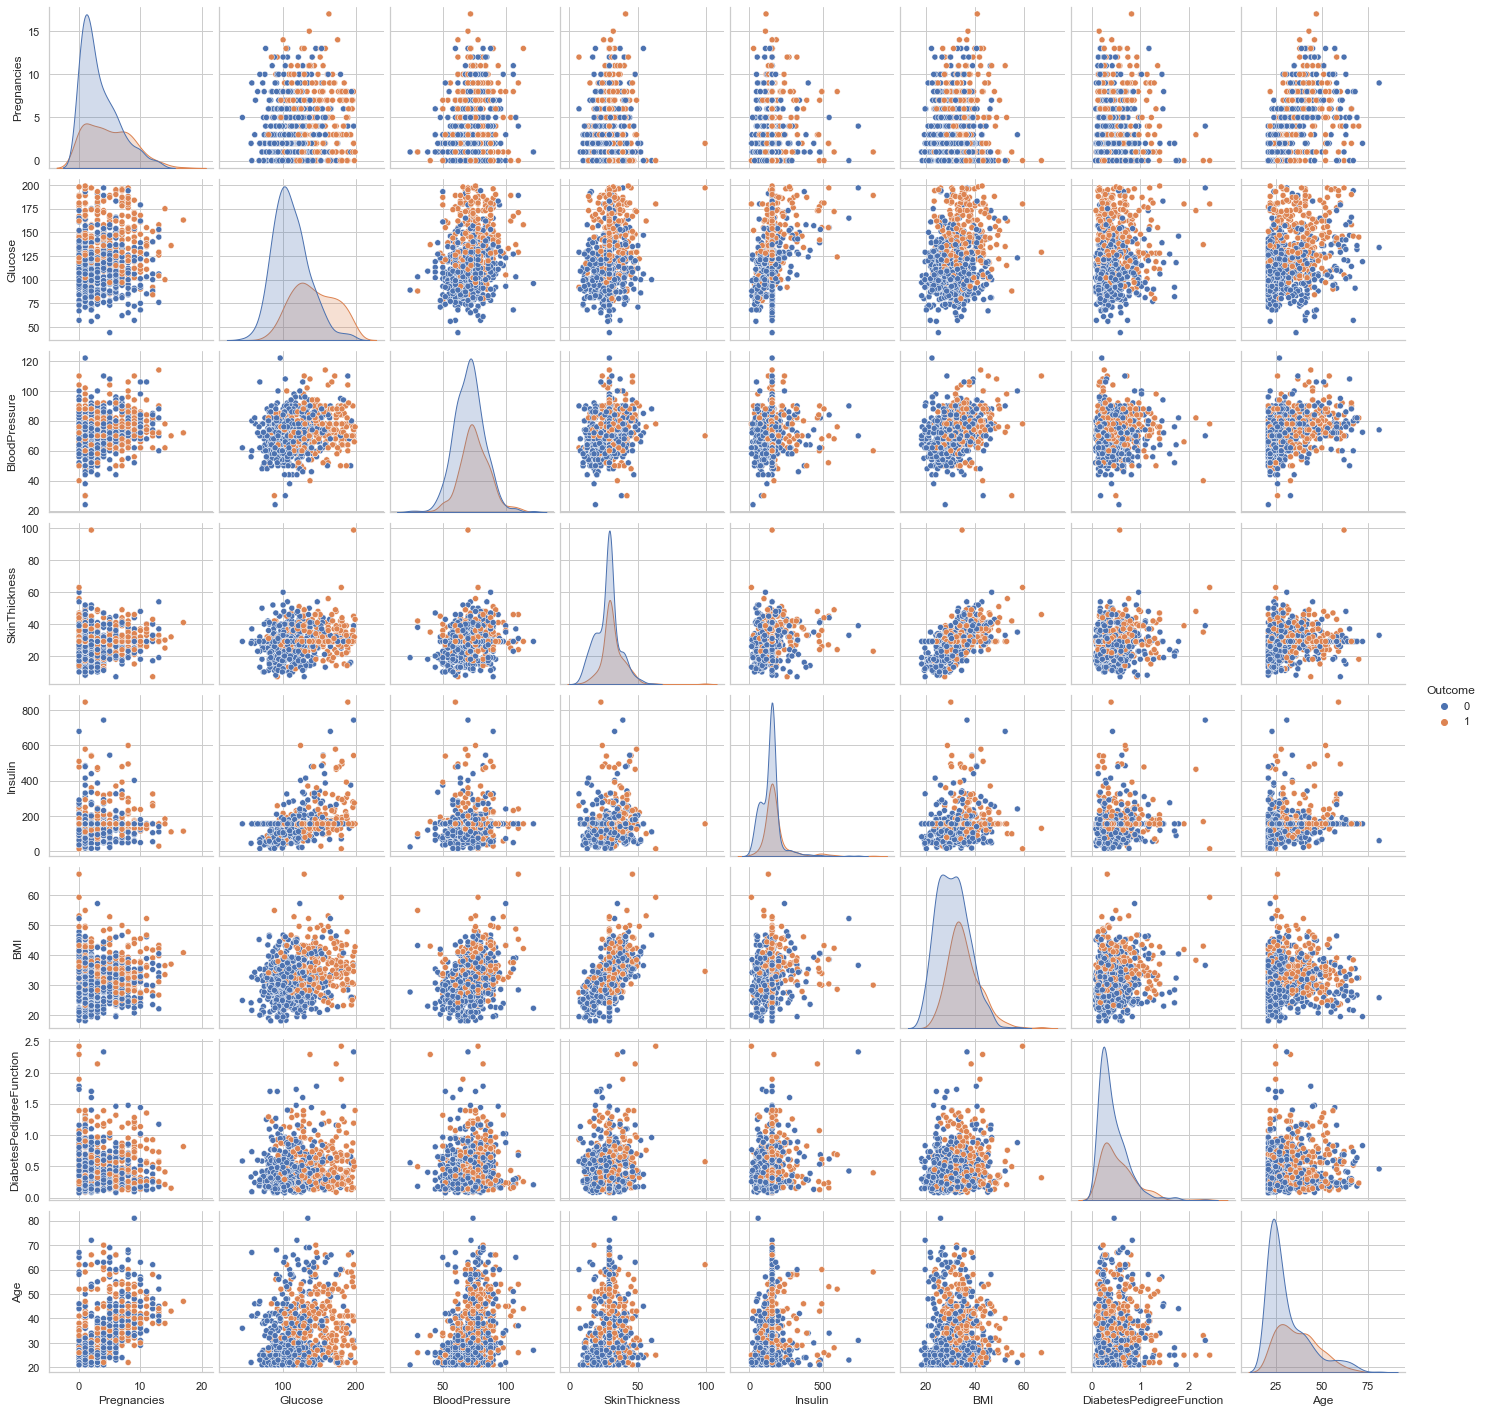

In [827]:
sns.pairplot(df_diabetes ,hue='Outcome')
plt.show()

In [828]:
df_diabetes.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.127911,0.208522,0.082989,0.056027,0.021565,-0.033523,0.544341,0.221898
Glucose,0.127911,1.000000,0.218367,0.192991,0.420157,0.230941,0.137060,0.266534,0.492928
BloodPressure,0.208522,0.218367,1.000000,0.192816,0.072517,0.281268,-0.002763,0.324595,0.166074
SkinThickness,0.082989,0.192991,0.192816,1.000000,0.158139,0.542398,0.100966,0.127872,0.215299
Insulin,0.056027,0.420157,0.072517,0.158139,1.000000,0.166586,0.098634,0.136734,0.214411
BMI,0.021565,0.230941,0.281268,0.542398,0.166586,1.000000,0.153400,0.025519,0.311924
DiabetesPedigreeFunction,-0.033523,0.137060,-0.002763,0.100966,0.098634,0.153400,1.000000,0.033561,0.173844
Age,0.544341,0.266534,0.324595,0.127872,0.136734,0.025519,0.033561,1.000000,0.238356
Outcome,0.221898,0.492928,0.166074,0.215299,0.214411,0.311924,0.173844,0.238356,1.000000


In [829]:
df_diabetes.corr()['Outcome'].sort_values(ascending=False)


Outcome                     1.000000
Glucose                     0.492928
BMI                         0.311924
Age                         0.238356
Pregnancies                 0.221898
SkinThickness               0.215299
Insulin                     0.214411
DiabetesPedigreeFunction    0.173844
BloodPressure               0.166074
Name: Outcome, dtype: float64

# Drop outliers

In [830]:
df_diabetes.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

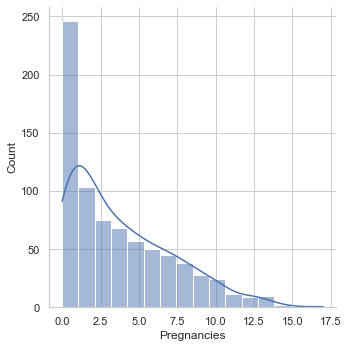

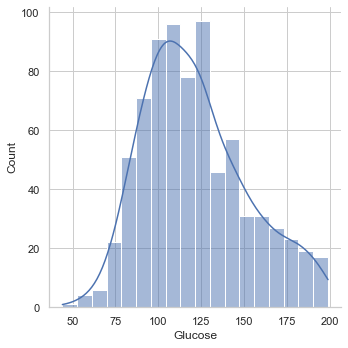

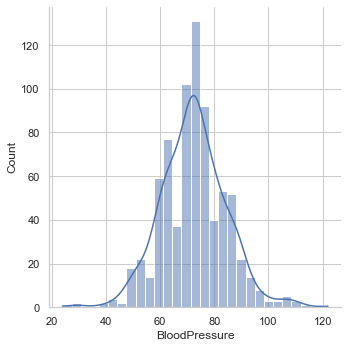

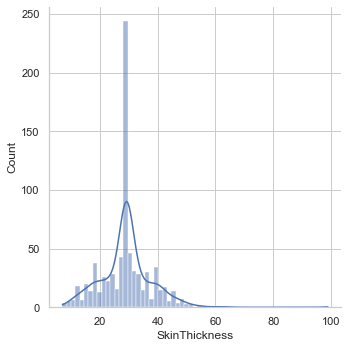

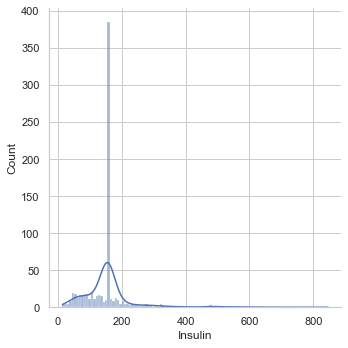

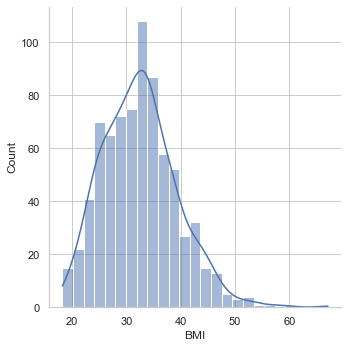

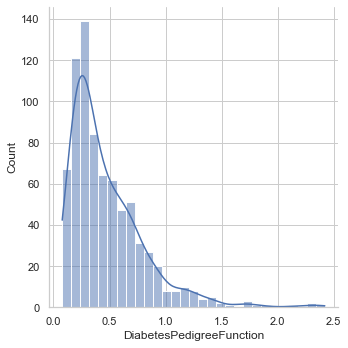

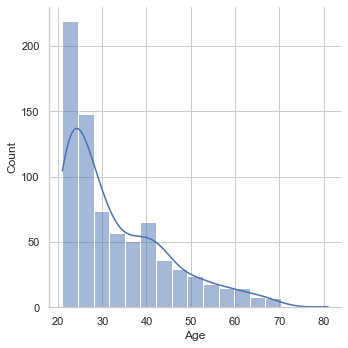

In [831]:
# distributions for all numeric variables
for i in df_diabetes.columns[0:-1] :
    sns.displot(data=df_diabetes, x=i, kde=True)

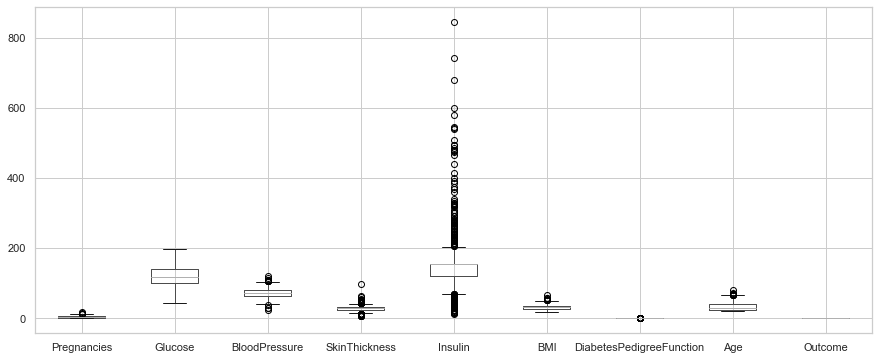

In [832]:
sns.set(style="whitegrid")
df_diabetes.boxplot(figsize=(15,6))
plt.show()

In [833]:
#outlier remove

Q1=df_diabetes.quantile(0.25)
Q3=df_diabetes.quantile(0.75)
IQR=Q3-Q1
#outlier remove
df_out = df_diabetes[~((df_diabetes < (Q1 - 1.5 * IQR)) |(df_diabetes > (Q3 + 1.5 * IQR))).any(axis=1)]
df_diabetes.shape,df_out.shape


((768, 9), (515, 9))

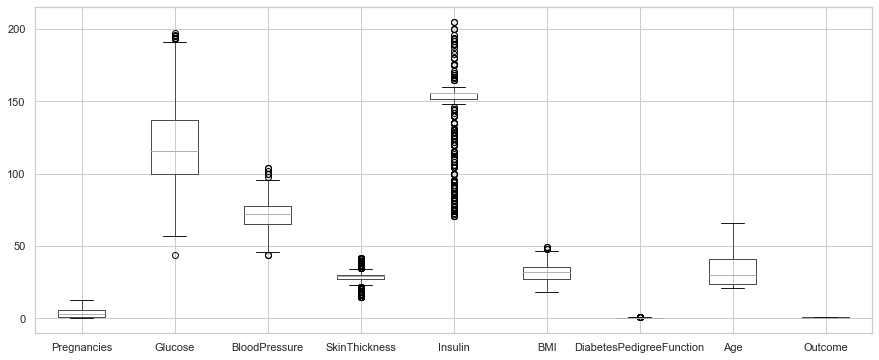

In [834]:
#box plot for outlier visualization
sns.set(style="whitegrid")
df_out.boxplot(figsize=(15,6))
plt.show()

In [835]:
df_diabetes =df_out

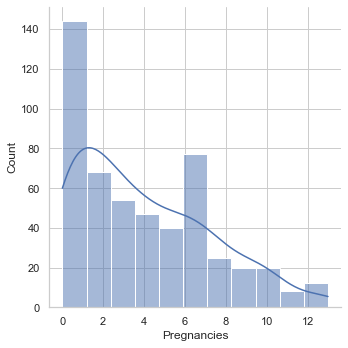

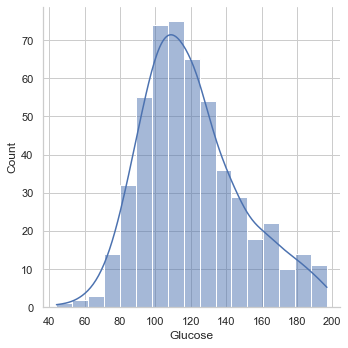

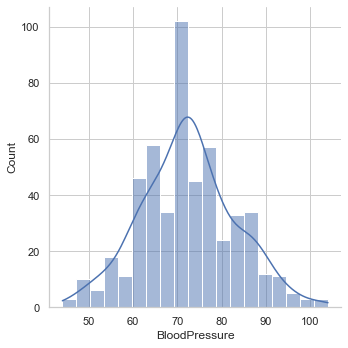

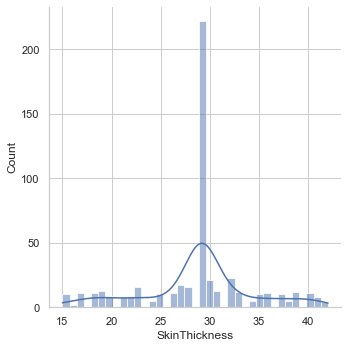

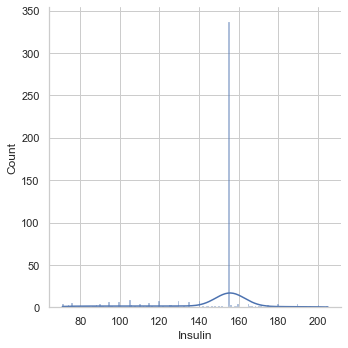

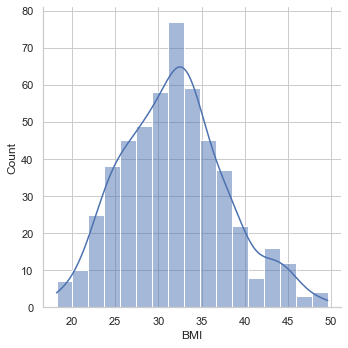

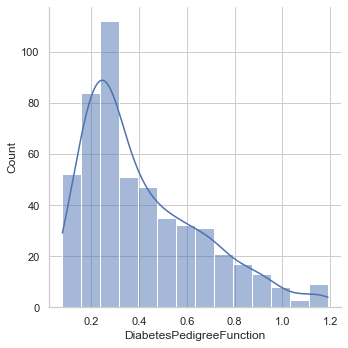

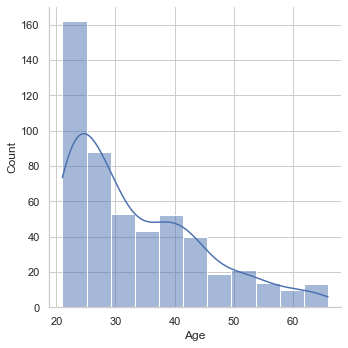

In [836]:
# distributions for all numeric variables after deleting the outliers

for i in df_diabetes.columns[0:-1] :
    sns.displot(data=df_diabetes, x=i, kde=True)

In [837]:
# def drop_outliers(df_diabetes,columns):
#         iqr=1.5*(np.percentile(df_diabetes[columns],75) - np.percentile(df_diabetes[columns],25))
#         df_diabetes.drop(df_diabetes[df_diabetes[columns]>(iqr+np.percentile(df_diabetes[columns],75))].index,inplace=True)
#         df_diabetes.drop(df_diabetes[df_diabetes[columns]<(np.percentile(df_diabetes[columns],25)-iqr)].index,inplace=True)
# drop_outliers(df_diabetes,"Pregnancies")
# drop_outliers(df_diabetes,"Glucose")
# drop_outliers(df_diabetes,"BloodPressure")
# drop_outliers(df_diabetes,"SkinThickness")
# drop_outliers(df_diabetes,"BMI")
# drop_outliers(df_diabetes,"Insulin")
# drop_outliers(df_diabetes,"DiabetesPedigreeFunction")
# drop_outliers(df_diabetes,"Age")

In [838]:
# for col in df_diabetes.columns:
#     plt.figure(figsize=(10,12))
#     sns.boxplot(x=col,data=df_diabetes ,order=df_diabetes[col].value_counts().index)
#     #print(df_diabetes.shape)


In [839]:
# def drop_outliers(df_diabetes,columns):
#     iqr=1.5*(np.percentile(df_diabetes[columns],75) - np.percentile(df_diabetes[columns],25))
#     df_diabetes.drop(df_diabetes[df_diabetes[columns]>(iqr+np.percentile(df_diabetes[columns],75))].index,inplace=True)
#     df_diabetes.drop(df_diabetes[df_diabetes[columns]<(np.percentile(df_diabetes[columns],25)-iqr)].index,inplace=True)
# drop_outliers(df_diabetes,"Pregnancies")
# drop_outliers(df_diabetes,"Glucose")
# drop_outliers(df_diabetes,"BloodPressure")
# drop_outliers(df_diabetes,"SkinThickness")
# drop_outliers(df_diabetes,"BMI")
# drop_outliers(df_diabetes,"Insulin")
# drop_outliers(df_diabetes,"DiabetesPedigreeFunction")
# drop_outliers(df_diabetes,"Age")

In [840]:
# for col in df_diabetes.columns:
#     plt.figure(figsize=(10,12))
#     sns.boxplot(x=col,data=df_diabetes ,order=df_diabetes[col].value_counts().index)


In [841]:
df_diabetes.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.110622,0.201698,0.129082,0.119618,0.028829,0.014969,0.513640,0.187868
Glucose,0.110622,1.000000,0.214924,0.069066,0.180899,0.152330,0.068436,0.266073,0.478218
BloodPressure,0.201698,0.214924,1.000000,0.128661,0.107820,0.229477,0.025405,0.352452,0.162221
SkinThickness,0.129082,0.069066,0.128661,1.000000,0.125630,0.415246,0.051262,0.074935,0.151155
Insulin,0.119618,0.180899,0.107820,0.125630,1.000000,0.029492,-0.032920,0.193573,0.140253
BMI,0.028829,0.152330,0.229477,0.415246,0.029492,1.000000,0.138813,0.013666,0.267172
DiabetesPedigreeFunction,0.014969,0.068436,0.025405,0.051262,-0.032920,0.138813,1.000000,0.021202,0.182401
Age,0.513640,0.266073,0.352452,0.074935,0.193573,0.013666,0.021202,1.000000,0.228587
Outcome,0.187868,0.478218,0.162221,0.151155,0.140253,0.267172,0.182401,0.228587,1.000000


In [842]:
df_diabetes.corr()['Outcome'].sort_values(ascending=False)


Outcome                     1.000000
Glucose                     0.478218
BMI                         0.267172
Age                         0.228587
Pregnancies                 0.187868
DiabetesPedigreeFunction    0.182401
BloodPressure               0.162221
SkinThickness               0.151155
Insulin                     0.140253
Name: Outcome, dtype: float64

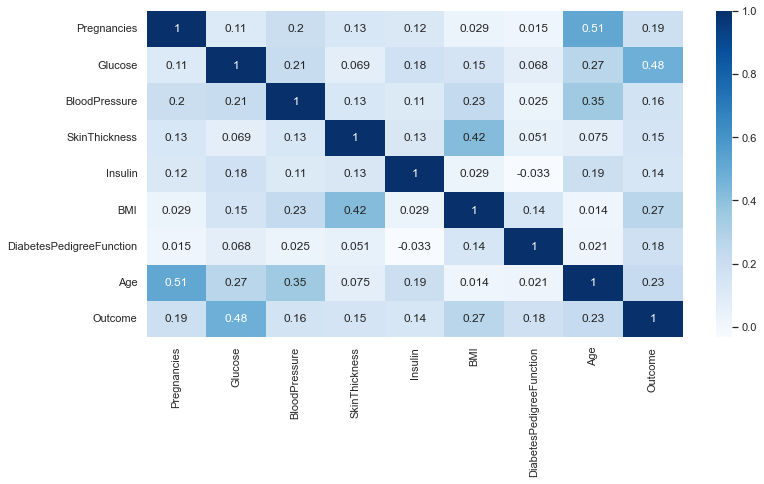

In [843]:
plt.figure(figsize=(12, 6))
sns.heatmap(df_diabetes.corr(), annot=True, cmap='Blues')  ## symmetric matrix
plt.show()

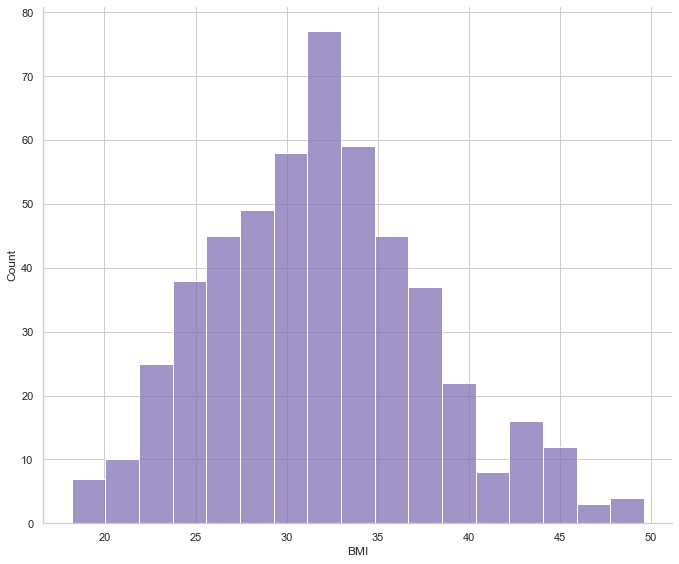

In [844]:
sns.displot(df_diabetes['BMI'],kde = False, color='m',height=8,aspect=1.2)
plt.show()

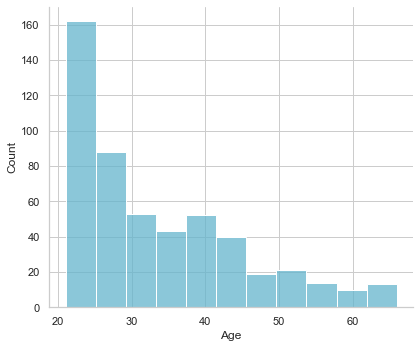

In [845]:
sns.displot(df_diabetes['Age'], color='c',height=5,aspect=1.2 )
plt.show()

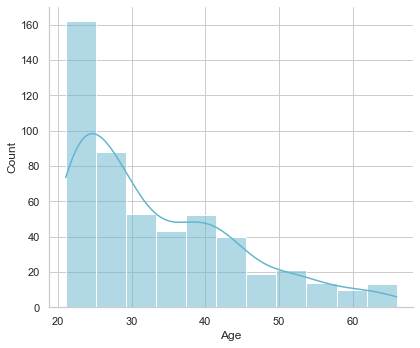

In [846]:
sns.displot(df_diabetes['Age'], color='c',kde =True,height=5,aspect=1.2)
plt.show()

In [847]:
df_diabetes.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.000000,35.00000,155.548223,33.600000,0.627,50,1
1,1,85.0,66.000000,29.00000,155.548223,26.600000,0.351,31,0
2,8,183.0,64.000000,29.15342,155.548223,23.300000,0.672,32,1
3,1,89.0,66.000000,23.00000,94.000000,28.100000,0.167,21,0
5,5,116.0,74.000000,29.15342,155.548223,25.600000,0.201,30,0
6,3,78.0,50.000000,32.00000,88.000000,31.000000,0.248,26,1
7,10,115.0,72.405184,29.15342,155.548223,35.300000,0.134,29,0
9,8,125.0,96.000000,29.15342,155.548223,32.457464,0.232,54,1
10,4,110.0,92.000000,29.15342,155.548223,37.600000,0.191,30,0
11,10,168.0,74.000000,29.15342,155.548223,38.000000,0.537,34,1


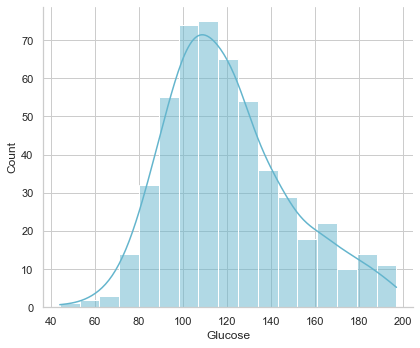

In [848]:
sns.displot(df_diabetes.Glucose, color='c',kde =True,height=5,aspect=1.2)
plt.show()

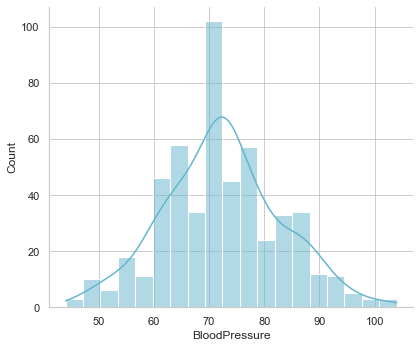

In [849]:
sns.displot(df_diabetes.BloodPressure, color='c',kde =True,height=5,aspect=1.2)

    

<AxesSubplot:>

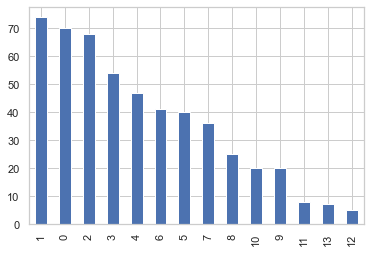

In [850]:
df_diabetes['Pregnancies'].value_counts().plot(kind='bar')

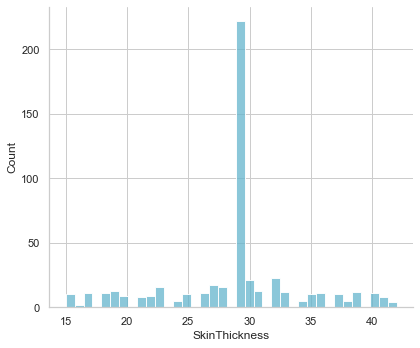

In [851]:
sns.displot(df_diabetes.SkinThickness, color='c',height=5,aspect=1.2)


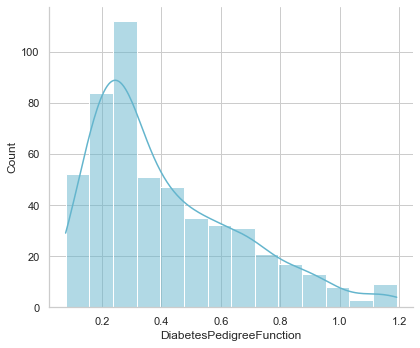

In [852]:
sns.displot(df_diabetes.DiabetesPedigreeFunction, color='c',kde =True,height=5,aspect=1.2)

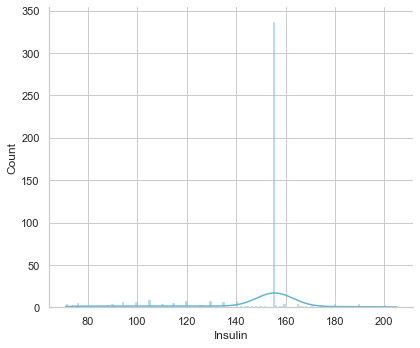

In [853]:
sns.displot(df_diabetes.Insulin, color='c',kde =True,height=5,aspect=1.2)

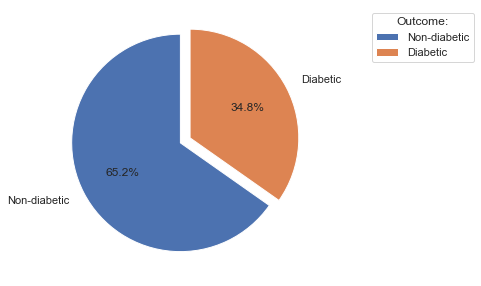

In [854]:
plt.figure(figsize=(5,5))

plt.pie(df_diabetes['Outcome'].value_counts(),labels=['Non-diabetic','Diabetic'],radius=1,
        autopct='%1.1f%%',explode = [0,0.1],labeldistance=1.15,startangle = 90)

plt.legend(title = 'Outcome:',loc='upper right', bbox_to_anchor=(1.6,1))
plt.show()

# Split Data

In [855]:
data = df_diabetes.iloc[:,0:8]
outcome = df_diabetes.iloc[:,8]
X , Y = data,outcome

In [856]:
print(X.shape)
print(Y.shape)

(515, 8)
(515,)


In [857]:
scaler = StandardScaler()
newx = scaler.fit_transform(X)
print(newx)


[[ 0.59980785  0.98895509 -0.03283239 ...  0.28690136  0.85924683
   1.4695238 ]
 [-0.92487648 -1.25325879 -0.59529548 ... -0.87955789 -0.25291665
  -0.22634722]
 [ 1.20968159  2.23462946 -0.78278318 ... -1.42946011  1.04057783
  -0.13709085]
 ...
 [ 0.29487099  0.02800628 -0.03283239 ... -0.94621271 -0.68005189
  -0.31560359]
 [-0.92487648  0.20595976 -1.15775857 ... -0.29632827 -0.2609758
   1.20175469]
 [-0.92487648 -0.96853322 -0.22032008 ... -0.24633716 -0.39798145
  -0.94039817]]


In [858]:
X = newx
print(X)

[[ 0.59980785  0.98895509 -0.03283239 ...  0.28690136  0.85924683
   1.4695238 ]
 [-0.92487648 -1.25325879 -0.59529548 ... -0.87955789 -0.25291665
  -0.22634722]
 [ 1.20968159  2.23462946 -0.78278318 ... -1.42946011  1.04057783
  -0.13709085]
 ...
 [ 0.29487099  0.02800628 -0.03283239 ... -0.94621271 -0.68005189
  -0.31560359]
 [-0.92487648  0.20595976 -1.15775857 ... -0.29632827 -0.2609758
   1.20175469]
 [-0.92487648 -0.96853322 -0.22032008 ... -0.24633716 -0.39798145
  -0.94039817]]


In [859]:
# split data 
X_train , X_test , y_train , y_test = train_test_split(X ,Y ,random_state=42, stratify=Y,test_size=0.2 )
#np.random.seed(0)

In [860]:
X_train.shape , X_test.shape , y_train.shape ,  y_test.shape

((412, 8), (103, 8), (412,), (103,))

# Build the Model


In [861]:
# svm , Random forst
## SVC 
linear_svc = svm.SVC(kernel='linear')
linear_svc.fit(X_train,y_train)

SVC(kernel='linear')

In [862]:
# accuracy score on the training data
X_train_prediction = linear_svc.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, y_train)


In [863]:
print('Accuracy Scores -- ', round(accuracy_score(X_train_prediction, y_train)*100),'%')

Accuracy Scores --  75 %


In [864]:
y_pred = linear_svc.predict(X_test)

In [865]:
print('Accuracy Scores -- ', round(accuracy_score(y_test, y_pred)*100),'%')


Accuracy Scores --  79 %


In [866]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.79      0.91      0.85        67
           1       0.77      0.56      0.65        36

    accuracy                           0.79       103
   macro avg       0.78      0.73      0.75       103
weighted avg       0.78      0.79      0.78       103



confusion_matrix  [[61  6]
 [16 20]]


<AxesSubplot:>

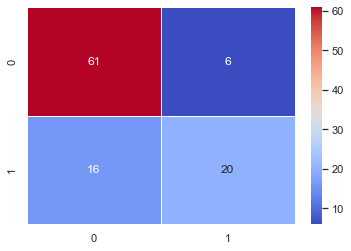

In [867]:
cm =confusion_matrix(y_test,y_pred)
print("confusion_matrix " , cm )
sns.heatmap(cm, cmap='coolwarm',annot = True ,linewidths=1,fmt="d")

# make the system 


In [868]:
input_data = (5,166,72,19,175,25.8,0.587,51)

# changing the input_data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

# standardize the input data
std_data = scaler.transform(input_data_reshaped)
print(std_data)

prediction = linear_svc.predict(std_data)
#print(prediction[0])

if (prediction[0] == 0):
    print('The person is not diabetic')
else:
    print('The person is diabetic')

[[ 0.29487099  1.62958762 -0.03283239 -1.74314798  1.13877148 -1.01286752
   0.69806371  1.55878017]]
The person is diabetic


D:\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


## Model using Random forset 


In [869]:
RF  = RandomForestClassifier(random_state=42, n_estimators=100,  max_depth=50,n_jobs=-1)
'''(n_estimators=100, max_depth=3, max_leaf_nodes=20, 
                                    criterion='gini', max_features=1.0, max_samples=0.8)'''

"(n_estimators=100, max_depth=3, max_leaf_nodes=20, \n                                    criterion='gini', max_features=1.0, max_samples=0.8)"

In [870]:
RF.fit(X_train,y_train)

RandomForestClassifier(max_depth=50, n_jobs=-1, random_state=42)

In [871]:
y_pred = RF.predict(X_test)

In [872]:
print('Accuracy Scores -- ', round(accuracy_score(y_test, y_pred)*100),'%')


Accuracy Scores --  74 %


confusion_matrix  [[57 10]
 [17 19]]


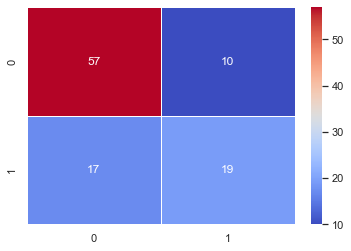

In [873]:
cmrf =confusion_matrix(y_test,y_pred)
print("confusion_matrix " , cmrf )
sns.heatmap(cmrf, cmap='coolwarm',annot = True ,linewidths=1,fmt="d")
plt.show()

# Model Using Logistic Regreesion

In [874]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)


LogisticRegression()

In [875]:
# accuracy score on the training data
X_train_prediction_log = logmodel.predict(X_train)
training_data_accuracy_log = accuracy_score(X_train_prediction_log, y_train)

In [876]:
print('Accuracy Scores -- ', round(accuracy_score(X_train_prediction_log, y_train)*100),'%')

Accuracy Scores --  75 %


In [877]:
y_pred_log =logmodel.predict(X_test)
print('Accuracy Scores -- ', round(accuracy_score(y_test, y_pred_log)*100),'%')

Accuracy Scores --  76 %


confusion_matrix  [[60  7]
 [18 18]]


<AxesSubplot:>

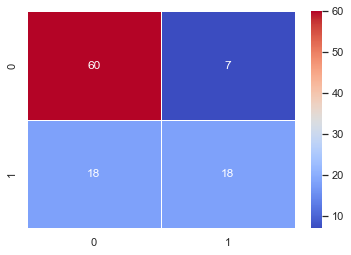

In [878]:
cmlog =confusion_matrix(y_test,y_pred_log)
print("confusion_matrix " , cmlog )
sns.heatmap(cmlog, cmap='coolwarm',annot = True ,linewidths=1,fmt="d")

# Model Using KNN


In [879]:
knn=KNeighborsClassifier(n_neighbors=5,metric='euclidean',p=2)
knn.fit(X_train,y_train)

KNeighborsClassifier(metric='euclidean')

In [880]:
y_pred=knn.predict(X_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0], dtype=int64)

In [881]:
knn.score(X_test,y_test)


0.7475728155339806

In [900]:
metrics.accuracy_score(y_test,y_pred)


NameError: name 'metrics' is not defined

confusion_matrix  [[55 12]
 [14 22]]


<AxesSubplot:>

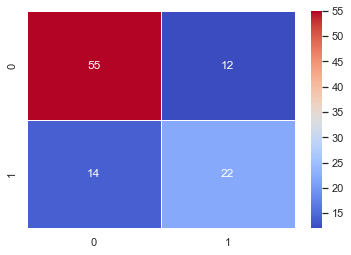

In [885]:
mat = confusion_matrix(y_test, y_pred)
mat
print("confusion_matrix " , mat )
sns.heatmap(mat, cmap='coolwarm',annot = True ,linewidths=1,fmt="d")

# MODEL USING KMEANS

In [886]:
sc = MinMaxScaler(feature_range = (0, 1))
dataset_scaled = sc.fit_transform(df_diabetesk1)

In [887]:
data1 = pd.DataFrame(dataset_scaled)
data1

,0,1,2,3,4,5,6,7,8
0,0.352941,0.670968,0.489796,0.304348,0.170130,0.314928,0.234415,0.483333,1.0
1,0.058824,0.264516,0.428571,0.239130,0.170130,0.171779,0.116567,0.166667,0.0
2,0.470588,0.896774,0.408163,0.240798,0.170130,0.104294,0.253629,0.183333,1.0
3,0.058824,0.290323,0.428571,0.173913,0.096154,0.202454,0.038002,0.000000,0.0
4,0.000000,0.600000,0.163265,0.304348,0.185096,0.509202,0.943638,0.200000,1.0
...,...,...,...,...,...,...,...,...,...
763,0.588235,0.367742,0.530612,0.445652,0.199519,0.300613,0.039710,0.700000,0.0
764,0.117647,0.503226,0.469388,0.217391,0.170130,0.380368,0.111870,0.100000,0.0
765,0.294118,0.496774,0.489796,0.173913,0.117788,0.163599,0.071307,0.150000,0.0
766,0.058824,0.529032,0.367347,0.240798,0.170130,0.243354,0.115713,0.433333,1.0


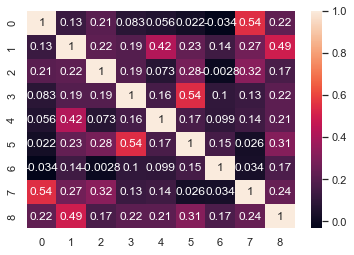

In [888]:
sns.heatmap(data1.corr(), annot = True)
plt.show()

# Observations:
1.The countplot tells us that the dataset is imbalanced, as number of patients who don't have diabetes is more than those who do.

2.From the correaltion heatmap, we can see that there is a high correlation between Outcome and [Glucose,BMI,Age]. We can select these features to accept input from the user and predict the outcome.

In [889]:

# Selecting features - [Glucose, Insulin, BMI]
X = data1.iloc[:, [1, 5, 5]].values
Y = data1.iloc[:, 8].values

In [890]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.20, random_state = 42, stratify = df_diabetesk1['Outcome'] )

In [891]:
# Checking dimensions
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("Y_train shape:", Y_train.shape)
print("Y_test shape:", Y_test.shape)

X_train shape: (614, 3)
X_test shape: (154, 3)
Y_train shape: (614,)
Y_test shape: (154,)


In [892]:
KMeans_Clustering = KMeans(n_clusters =2, random_state=0)
KMeans_Clustering.fit(X_train)

KMeans(n_clusters=2, random_state=0)

In [893]:
print(KMeans_Clustering.cluster_centers_)


[[0.39093369 0.23733383 0.23733383]
 [0.68556447 0.38164466 0.38164466]]


In [894]:
kpred = KMeans_Clustering.predict(X_testk)

print('Classification report:\n\n', sklearn.metrics.classification_report(Y_test,kpred))

Classification report:

               precision    recall  f1-score   support

         0.0       0.76      0.82      0.79       100
         1.0       0.61      0.52      0.56        54

    accuracy                           0.71       154
   macro avg       0.68      0.67      0.67       154
weighted avg       0.71      0.71      0.71       154



Confusion Matrix :


<AxesSubplot:>

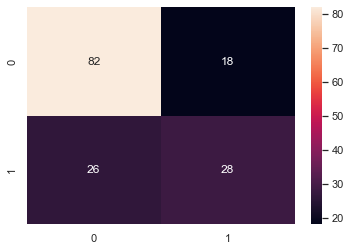

In [895]:
print("Confusion Matrix :")
outcome_labels = sorted(df_diabetes.Outcome.unique())
sns.heatmap(
    confusion_matrix(Y_test, kpred),
    annot=True,
    xticklabels=outcome_labels,
    yticklabels=outcome_labels
)

In [896]:
#print("all data must be entered in 0-1 range")
#G= input("enter Glucose level : ")
#B = input("enter BMI level : " )
#A= input("enter Age : ")
#out = KMeans_Clustering.predict([[G,B,A]])

out = KMeans_Clustering.predict([[0.53,0.54,0.5253]])
if (out==0):
    print("No Diabetes")
else:
    print("Diabetes")


Diabetes


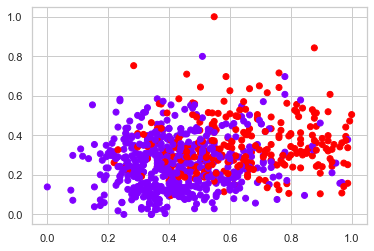

In [897]:
plt.scatter(data1.iloc[:, [1]].values,data1.iloc[:, [5]].values, c=df_diabetesk1['Outcome'], cmap='rainbow')


In [898]:
KMeans_Clustering = KMeans(n_clusters =2, random_state=0)
KMeans_Clustering.fit(X)


KMeans(n_clusters=2, random_state=0)

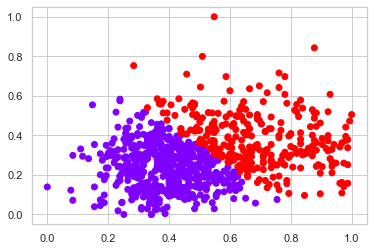

In [899]:
plt.scatter(data1.iloc[:, [1]].values,data1.iloc[:, [5]].values, c=KMeans_Clustering.labels_, cmap='rainbow')
